In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from pathlib import Path
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix


current_dir = Path(os.getcwd())
train_dir = r"C:\Users\ayse\Desktop\bootcamp_project_yzta\Dataset\train"
test_dir = r"C:\Users\ayse\Desktop\bootcamp_project_yzta\Dataset\test"

# Parametreler
img_height, img_width = 128, 128
batch_size = 32
# G√∂rselleri y√ºkle (Data + Data Augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,          # Hafif d√∂nd√ºrme
    width_shift_range=0.1,      # Yatay kaydƒ±rma
    height_shift_range=0.1,     # Dikey kaydƒ±rma
    horizontal_flip=True,       # Yatay √ßevirme
    zoom_range=0.1,             # Yakƒ±nla≈ütƒ±rma
    brightness_range=[0.8, 1.2], # Parlaklƒ±k deƒüi≈üimi
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Sƒ±nƒ±f sayƒ±sƒ±nƒ± al
num_classes = len(train_generator.class_indices)
print(f"Toplam sƒ±nƒ±f sayƒ±sƒ±: {num_classes}")

# Transfer learning modeli
base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)

base_model.trainable = False

# Basit Neural Network Modeli
transfer_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])
transfer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# CNN Modeli
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])
cnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Found 2092 images belonging to 19 classes.
Found 517 images belonging to 19 classes.
Found 895 images belonging to 19 classes.
Toplam sƒ±nƒ±f sayƒ±sƒ±: 19


C:\Users\ayse\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Transfer Learning modeli eƒüitiliyor (class weight olmadan)...
Class weight olmadan eƒüitim ba≈ülƒ±yor...


C:\Users\ayse\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
66/66 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 52s 610ms/step - accuracy: 0.2836 - loss: 2.5557 - val_accuracy: 0.3250 - val_loss: 2.3399 - learning_rate: 0.0010
Epoch 2/15
66/66 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 283ms/step - accuracy: 0.2960 - loss: 2.4349 - val_accuracy: 0.3250 - val_loss: 2.3387 - learning_rate: 0.0010
Epoch 3/15
66/66 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 27s 408ms/step - accuracy: 0.3022 - loss: 2.4124 - val_accuracy: 0.3250 - val_loss: 2.3287 - learning_rate: 0.0010
Epoch 4/15
66/66 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 290ms/step - accuracy: 0.3265 - loss: 2.3740 - val_accuracy: 0.3250 - val_loss: 2.3530 - learning_rate: 0.0010
Epoch 5/15
66/66 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 285ms/step - accuracy: 0.3244 - loss: 2.3946 - val_accuracy: 0.3250 - val_loss: 2.3235 - learning_rate: 0.0010
Epoch 6/15
66/66 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


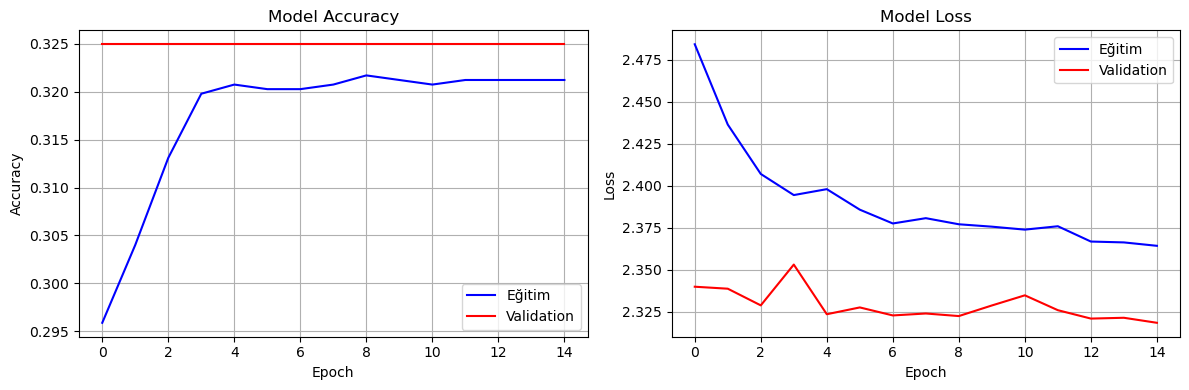

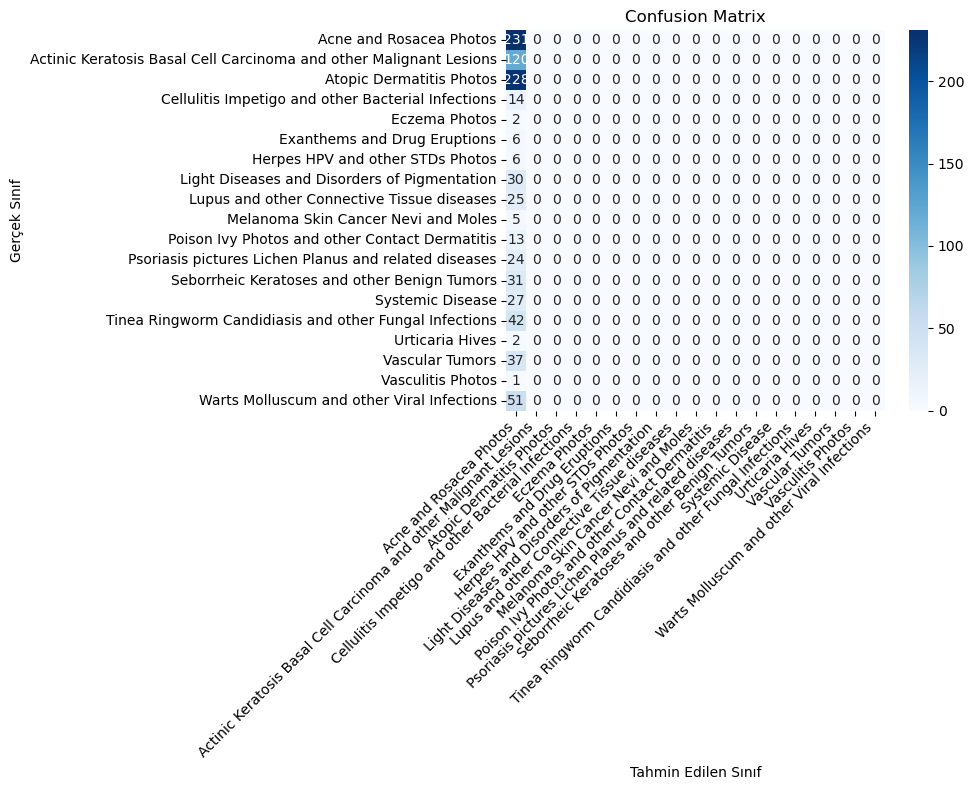


=== PERFORMANS √ñZETƒ∞ ===
Son epoch train accuracy: 0.3212
Son epoch validation accuracy: 0.3250
En iyi validation accuracy: 0.3250
Test accuracy: 0.2581
Overfitting gap: -0.0037
‚úÖ ƒ∞yi genelleme

‚úÖ T√ºm s√ºre√ß tamamlandƒ±!


In [2]:

# ADIM 1: √ñnce class weight olmadan √ßalƒ±≈ütƒ±ralƒ±m
print("Transfer Learning modeli eƒüitiliyor (class weight olmadan)...")

# Import necessary libraries
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import numpy as np

# Define callbacks with modified checkpoint configuration
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    'best_model.weights.h5',  # <-- dosya uzantƒ±sƒ± d√ºzeltildi
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min'
)

# Training the model
print("Class weight olmadan eƒüitim ba≈ülƒ±yor...")
history_transfer = transfer_model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stopping, reduce_lr, checkpoint],
    verbose=1
)

print("‚úÖ ƒ∞lk eƒüitim tamamlandƒ±!")

# ADIM 2: Class weight'i g√ºvenli ≈üekilde hesapla
print("\nClass weight hesaplanƒ±yor...")

# Numpy array'e √ßevir
train_classes = np.array(train_generator.classes)
unique_classes = np.unique(train_classes)

# Manuel class weight hesaplama (daha g√ºvenli)
class_weight_dict = {}
total_samples = len(train_classes)
n_classes = len(unique_classes)

for class_idx in unique_classes:
    class_count = np.sum(train_classes == class_idx)
    weight = total_samples / (n_classes * class_count)
    class_weight_dict[int(class_idx)] = float(weight)

print(f"Hesaplanan class weight'ler: {class_weight_dict}")

# ADIM 3: Class weight ile yeniden eƒüit (isteƒüe baƒülƒ±)
print("\nClass weight ile fine-tuning...")

# Import Path and define model directory
from pathlib import Path
model_dir = Path('models')
model_dir.mkdir(exist_ok=True)

# Yeni model checkpoint
checkpoint_balanced = ModelCheckpoint(
    str(model_dir / 'balanced_transfer_model.keras'),
    monitor='val_accuracy',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# Daha d√º≈ü√ºk learning rate ile fine-tune
transfer_model.compile(
    optimizer=Adam(learning_rate=0.0001),  # Daha d√º≈ü√ºk lr
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Convert the tensor values to regular Python floats
class_weight_dict = {
    i: float(weight.numpy()) if hasattr(weight, 'numpy') else float(weight)
    for i, weight in class_weight_dict.items()
}



# Now use the converted weights in model.fit()
history_balanced = transfer_model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr, checkpoint_balanced],
    verbose=1
)

print("‚úÖ Balanced eƒüitim tamamlandƒ±!")

# ADIM 4: Sonu√ßlarƒ± deƒüerlendir
print("\n=== MODEL DEƒûERLENDƒ∞RME ===")

# Test verisi √ºzerinde deƒüerlendirme
test_loss, test_accuracy = transfer_model.evaluate(test_generator, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Confusion matrix i√ßin tahminler
print("Tahminler hesaplanƒ±yor...")
test_generator.reset()  # Generator'ƒ± sƒ±fƒ±rla
y_pred = transfer_model.predict(test_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Sƒ±nƒ±f isimleri
class_names = list(train_generator.class_indices.keys())

# Sƒ±nƒ±flandƒ±rma raporu
print("\nSƒ±nƒ±flandƒ±rma Raporu:")
try:
    report = classification_report(y_true, y_pred_classes, target_names=class_names)
    print(report)
except Exception as e:
    print(f"Rapor olu≈üturulurken hata: {e}")
    print("Basit accuracy hesaplanƒ±yor...")
    accuracy = np.mean(y_true == y_pred_classes)
    print(f"Accuracy: {accuracy:.4f}")

# G√∂rselle≈ütirme
print("\nG√∂rselle≈ütirme...")
try:
    # Eƒüitim grafiƒüi
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history_transfer.history['accuracy'], label='Eƒüitim', color='blue')
    plt.plot(history_transfer.history['val_accuracy'], label='Validation', color='red')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history_transfer.history['loss'], label='Eƒüitim', color='blue')
    plt.plot(history_transfer.history['val_loss'], label='Validation', color='red')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Ger√ßek Sƒ±nƒ±f')
    plt.xlabel('Tahmin Edilen Sƒ±nƒ±f')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"G√∂rselle≈ütirme hatasƒ±: {e}")

# Model performans √∂zeti
print("\n=== PERFORMANS √ñZETƒ∞ ===")
try:
    final_train_acc = history_transfer.history['accuracy'][-1]
    final_val_acc = history_transfer.history['val_accuracy'][-1]
    best_val_acc = max(history_transfer.history['val_accuracy'])

    print(f"Son epoch train accuracy: {final_train_acc:.4f}")
    print(f"Son epoch validation accuracy: {final_val_acc:.4f}")
    print(f"En iyi validation accuracy: {best_val_acc:.4f}")
    print(f"Test accuracy: {test_accuracy:.4f}")

    overfitting_gap = final_train_acc - final_val_acc
    print(f"Overfitting gap: {overfitting_gap:.4f}")

    if overfitting_gap > 0.15:
        print("‚ö†Ô∏è  G√º√ßl√º overfitting - daha fazla regularization gerekli")
    elif overfitting_gap > 0.1:
        print("üîÑ Orta seviye overfitting - kabul edilebilir")
    else:
        print("‚úÖ ƒ∞yi genelleme")

except Exception as e:
    print(f"Performans analizi hatasƒ±: {e}")

print("\n‚úÖ T√ºm s√ºre√ß tamamlandƒ±!")

28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 147ms/step
              precision    recall  f1-score   support

           0       0.26      1.00      0.41       231
           1       0.00      0.00      0.00       120
           2       0.00      0.00      0.00       228
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         6
           7       0.00      0.00      0.00        30
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        13
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        31
          13       0.00      0.00      0.00        27
          14       0.00      0.00      0.00        42
          15       0.00      0.00      0.00         2


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


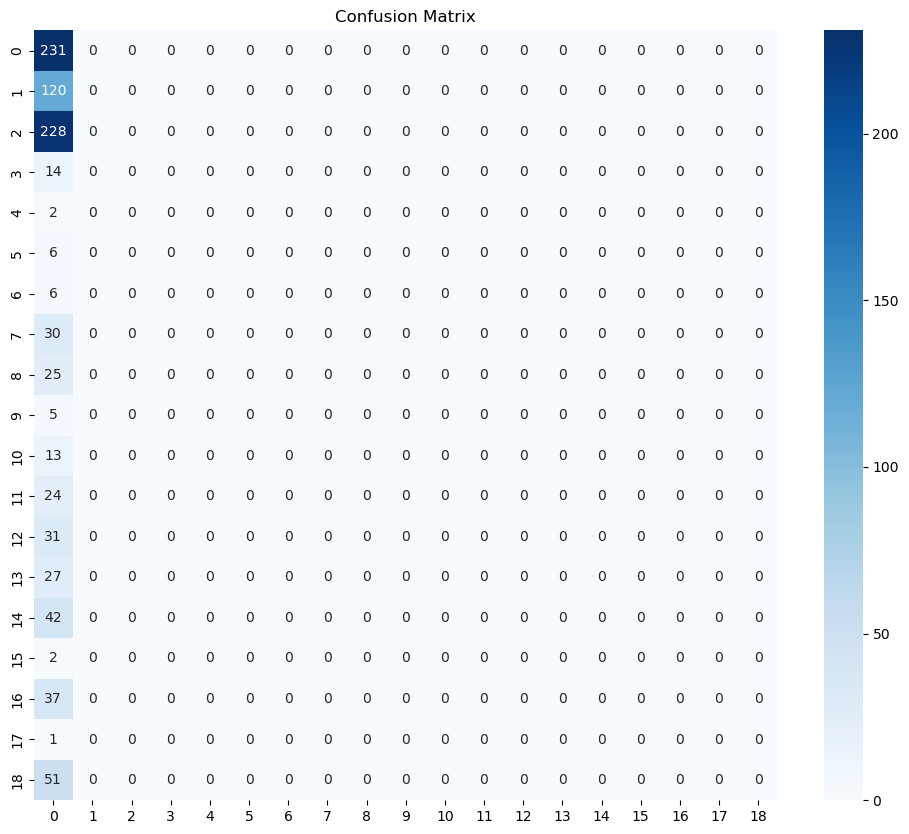

In [3]:
y_pred = transfer_model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

# Sƒ±nƒ±flandƒ±rma raporu
print(classification_report(y_true, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [4]:
def predict_disease_probabilities(image_path, model, class_names):
    """
    Bir g√∂r√ºnt√º i√ßin hastalƒ±k olasƒ±lƒ±klarƒ±nƒ± d√∂nd√ºr√ºr
    """
    # G√∂r√ºnt√ºy√º y√ºkle ve hazƒ±rla
    img = image.load_img(image_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0

    # Tahmin yap
    predictions = model.predict(img_array)

    # Sƒ±nƒ±f adlarƒ± ve olasƒ±lƒ±klarƒ± e≈üle≈ütir
    disease_probabilities = {}
    for i, class_name in enumerate(class_names):
        disease_probabilities[class_name] = float(predictions[0][i])

    # Olasƒ±lƒ±ƒüa g√∂re sƒ±rala
    sorted_diseases = sorted(disease_probabilities.items(),
                           key=lambda x: x[1], reverse=True)

    return sorted_diseases

In [5]:
class_names = list(train_generator.class_indices.keys())
print(f"\nMevcut sƒ±nƒ±flar: {class_names}")

# Bir test g√∂r√ºnt√ºs√º √ºzerinde √∂rnek
probabilities = predict_disease_probabilities(
    'Dataset/test/Acne and Rosacea Photos/acne-closed-comedo-003.jpg',
    transfer_model,
    class_names
)
print("\nHastalƒ±k Olasƒ±lƒ±klarƒ±:")
for disease, probability in probabilities:
    print(f"{disease}: %{probability*100:.2f}")


Mevcut sƒ±nƒ±flar: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step

Hastalƒ±k Olasƒ±lƒ±klarƒ±:
Acne and Rosacea Photos: %11.79
Light Diseases and Disorders of Pigmentation: %8.16
Actinic Keratosis Basal Cell Carcinoma and other Maligna

In [9]:
class_names = list(train_generator.class_indices.keys())
print(f"\nMevcut sƒ±nƒ±flar: {class_names}")

# Bir test g√∂r√ºnt√ºs√º √ºzerinde √∂rnek
probabilities = predict_disease_probabilities(
    'Dataset/test/Acne and Rosacea Photos/acne-closed-comedo-003.jpg',
    transfer_model,
    class_names
)
print("\nHastalƒ±k Olasƒ±lƒ±klarƒ±:")
for disease, probability in probabilities:
    print(f"{disease}: %{probability*100:.2f}")


Mevcut sƒ±nƒ±flar: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step

Hastalƒ±k Olasƒ±lƒ±klarƒ±:
Acne and Rosacea Photos: %12.82
Light Diseases and Disorders of Pigmentation: %8.86
Actinic Keratosis Basal Cell Carcinoma and other Malig

In [10]:
class_names = list(train_generator.class_indices.keys())
print(f"\nMevcut sƒ±nƒ±flar: {class_names}")

# Bir test g√∂r√ºnt√ºs√º √ºzerinde √∂rnek
probabilities = predict_disease_probabilities(
    'Dataset/test/Acne and Rosacea Photos/acne-closed-comedo-003.jpg',
    transfer_model,
    class_names
)
print("\nHastalƒ±k Olasƒ±lƒ±klarƒ±:")
for disease, probability in probabilities:
    print(f"{disease}: %{probability*100:.2f}")


Mevcut sƒ±nƒ±flar: ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 35ms/step

Hastalƒ±k Olasƒ±lƒ±klarƒ±:
Acne and Rosacea Photos: %12.82
Light Diseases and Disorders of Pigmentation: %8.86
Actinic Keratosis Basal Cell Carcinoma and other Malig